<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [78]:
!pip install keras-tuner

In [79]:
import pandas as pd
# from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import keras_tuner as kt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, regularizers
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
    StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

## Load the dataset

In [80]:
# drive.mount('/content/drive')

In [81]:
# dataset_path = '/content/drive/MyDrive/ML IIT/coursework/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [82]:
url = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"

## Check dataset behaviour

In [83]:
df=pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [84]:
df.shape

(7043, 21)

## Data Preprocessing

In [ ]:
categorical_cols=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',"Churn"]
numerical_cols=['MonthlyCharges','TotalCharges','tenure']

In [101]:
categorical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [102]:
numerical_cols

['MonthlyCharges', 'TotalCharges', 'tenure']

In [103]:
df_cp=df.copy()

In [104]:
df_cp = df_cp.drop(columns=['customerID'])
df_cp.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [105]:
len(df_cp.columns)

20

In [106]:
df_cp.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [107]:
df_cp["SeniorCitizen"].isnull().sum()


np.int64(0)

In [108]:
df_cp.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [109]:
df_cp['TotalCharges']=df_cp['TotalCharges'].fillna(df_cp['TotalCharges'].median())

In [110]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [111]:
for col in df_cp.columns:
  # print(col)
  value=df_cp[col].value_counts()
  print(value)
  print('*'*50)
  print("\n")

gender
Male      3555
Female    3488
Name: count, dtype: int64
**************************************************


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
**************************************************


Partner
No     3641
Yes    3402
Name: count, dtype: int64
**************************************************


Dependents
No     4933
Yes    2110
Name: count, dtype: int64
**************************************************


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
**************************************************


PhoneService
Yes    6361
No      682
Name: count, dtype: int64
**************************************************


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
**************************************************


InternetService
Fiber optic    3096
DSL            242

In [112]:
for col in df_cp.columns:
  print("\n")
  print(col)
  print(df_cp[col].unique())

  print("\n")
  print('*'*50)




gender
['Female' 'Male']


**************************************************


SeniorCitizen
[0 1]


**************************************************


Partner
['Yes' 'No']


**************************************************


Dependents
['No' 'Yes']


**************************************************


tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


**************************************************


PhoneService
['No' 'Yes']


**************************************************


MultipleLines
['No phone service' 'No' 'Yes']


**************************************************


InternetService
['DSL' 'Fiber optic' 'No']


**************************************************


OnlineSecurity
['No' 'Yes' 'No internet service']


**************************************************


OnlineBackup
['Ye

In [113]:
# In this dataset there are some features both represent same meaning.Here i convert those to one
df_cp['MultipleLines'] = df_cp['MultipleLines'].replace('No phone service', 'No')
df_cp[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = df_cp[['OnlineSecurity', 'OnlineBackup',
                                                                'DeviceProtection', 'TechSupport',
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [114]:
df_cp

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [115]:
# SeniorCitizen is a binary categorical feature
categorical_cols=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',"Churn"]
numerical_cols=['MonthlyCharges','TotalCharges','tenure']
len(categorical_cols)

17

In [116]:
label_encoding_columns=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn','MultipleLines','OnlineSecurity','OnlineBackup',
                        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

one_hot_encoding_columns=['InternetService','Contract','PaymentMethod']

len(label_encoding_columns)+len(one_hot_encoding_columns)

16

<Axes: >

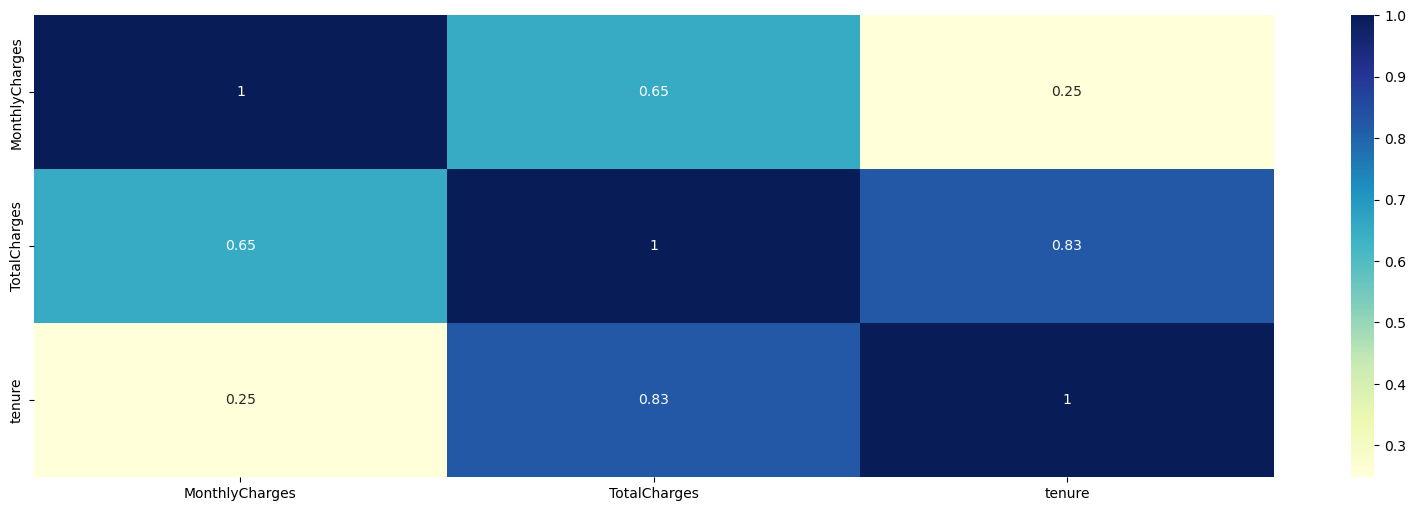

In [117]:
plt.figure(figsize=(20, 6))
sns.heatmap(df_cp[numerical_cols].corr(), cmap = 'YlGnBu', annot = True)

#### Label Encoding

In [118]:
#Label encoding method use for binary categories
l_encoder=LabelEncoder()

for col in label_encoding_columns:
  df_cp[col]=l_encoder.fit_transform(df_cp[col])

In [119]:
df_cp.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


#### One-Hot Encoding

In [120]:
#One-Hot encoder use for multi class categories
oneHot_encoder=OneHotEncoder(sparse_output=False,drop=None)
encoded_data=oneHot_encoder.fit_transform(df_cp[one_hot_encoding_columns])
oneHot_encoded_df=pd.DataFrame(encoded_data,columns=oneHot_encoder.get_feature_names_out(one_hot_encoding_columns))

In [121]:
df_cp_final=df_cp.drop(columns=one_hot_encoding_columns)
df_cp_final=pd.concat([df_cp_final,oneHot_encoded_df],axis=1)
df_cp_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [122]:
df_cp_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [123]:
for col in df_cp.columns:
  print("\n")
  print(col)
  print(df_cp[col].unique())

  print("\n")
  print('*'*50)



gender
[0 1]


**************************************************


SeniorCitizen
[0 1]


**************************************************


Partner
[1 0]


**************************************************


Dependents
[0 1]


**************************************************


tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


**************************************************


PhoneService
[0 1]


**************************************************


MultipleLines
[0 1]


**************************************************


InternetService
['DSL' 'Fiber optic' 'No']


**************************************************


OnlineSecurity
[0 1]


**************************************************


OnlineBackup
[1 0]


**************************************************


DeviceProtection
[0 1]


******

#### Handle class imbalance

In [124]:
df_cp_final['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [125]:
# Need to handle this,because of this class imbalance ML model can become biased toward the majority class

In [126]:
df_cp_final.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [127]:
X=df_cp_final.drop(columns=['Churn'],axis=1)
y=df_cp_final['Churn']


In [128]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,0,1,1,72,1,1,0,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,0,1,1,11,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,1,0,4,1,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [129]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [130]:
# smote=SMOTE(random_state=42)
# X_resampled,y_resampled=smote.fit_resample(X,y)

In [131]:
# y_resampled.value_counts()

In [132]:
# count=y_resampled.value_counts()
# count.plot(kind='bar')
# plt.xlabel('Churn')
# plt.ylabel('Count')
# plt.title('Count Plot for Churn')

### Split Data into Training, Validation, and Test Sets

In [161]:

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
# print(f"Shape of X_val: {X_val.shape}")
# print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (5634, 26)
Shape of y_train: (5634,)
Shape of X_test: (1409, 26)
Shape of y_test: (1409,)


In [162]:
smote=SMOTE(random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)

In [163]:
y_train.value_counts()

Churn
0    4139
1    4139
Name: count, dtype: int64

In [135]:
def plot_history(history):
    # Loss
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()


    # Accuracy
    plt.subplot(1,3,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()


    # AUC
    plt.subplot(1,3,3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title("AUC Curve")
    plt.xlabel("Epochs")
    plt.ylabel("AUC Score")
    plt.legend()
    plt.show()




In [164]:
input_dim=X_train.shape[1]
input_dim

26

In [137]:
# os.makedirs("models", exist_ok=True)
#
# best_tuned_model_test_02.save("models/best_nn_model.keras")


## Decision Tree Traininig

#### Test 01

In [165]:
dt_model = DecisionTreeClassifier(
    criterion="entropy",         # Use 'entropy' for information gain
    max_depth=6,             # Prevent overfitting
    min_samples_split=40,     # Minimum samples required for a split
    min_samples_leaf=20,      # Minimum samples per leaf
  # Handle class imbalance
    random_state=42
)

# Train model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=20,
                       min_samples_split=40, random_state=42)

In [166]:
y_pred = dt_model.predict(X_test)


In [167]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[849, 186],
       [127, 247]])

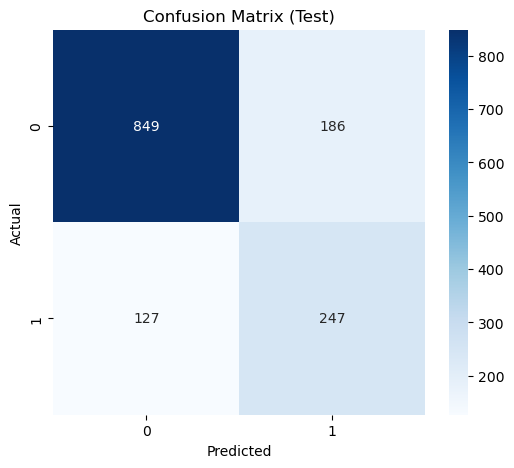

In [168]:

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [169]:
y_pred_proba_deci_1 = dt_model.predict(X_test).ravel()
y_pred_deci_1 = (y_pred_proba_deci_1 >= 0.5).astype(int)
print("Test AUC:", roc_auc_score(y_test, y_pred_proba_deci_1))
print("Test Accuracy:", accuracy_score(y_test, y_pred_deci_1))
print(classification_report(y_test, y_pred_deci_1))

Test AUC: 0.7403588312795474
Test Accuracy: 0.7778566359119943
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



c:\Users\chanu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\chanu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\chanu\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\chanu\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
        estimator,
    ...<2 lines>...
        pos_label=pos_label,
    )
  File "c:\Users\chanu\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    r

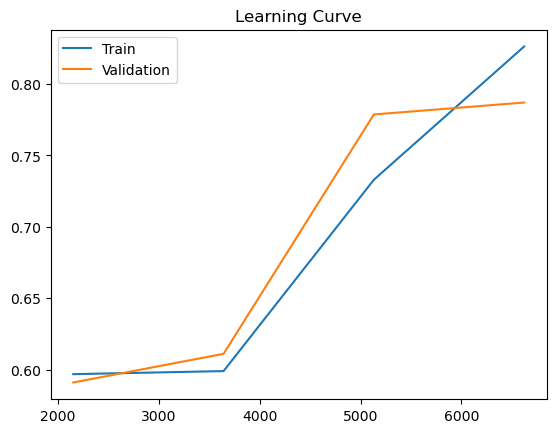

In [170]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    dt_model, X_train, y_train, scoring="f1"
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation")
plt.legend()
plt.title("Learning Curve")
plt.show()


#### Test 02

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
from scipy.stats import randint, uniform

param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": randint(3, 40),           # shallow to deep
    "min_samples_split": randint(2, 50),   # min samples to split
    "min_samples_leaf": randint(1, 30),    # leaf size
    "max_features": [None, "sqrt", "log2"],
    "ccp_alpha": uniform(0.0, 0.02),       # small alphas for pruning
    # "class_weight": [None, "balanced"]
    "class_weight": [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 2, 1: 1}, "balanced"]

}
 



dt = DecisionTreeClassifier(random_state=42)


rs = RandomizedSearchCV(
    dt,
    param_distributions=param_dist,
    n_iter=150,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42,
    refit=True
)

rs.fit(X_train, y_train)

print("Best params (random search):", rs.best_params_)
print("Best cross-val ROC AUC:", rs.best_score_)
best_dt = rs.best_estimator_


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best params (random search): {'ccp_alpha': np.float64(0.0016269756128379953), 'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 21, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 23}
Best cross-val ROC AUC: 0.9084627900391361


Test accuracy: 0.7494677075940384
Test precision: 0.519774011299435
Test recall: 0.7379679144385026
Test f1: 0.6099447513812155
Test ROC AUC: 0.8121896716525873

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82      1035
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



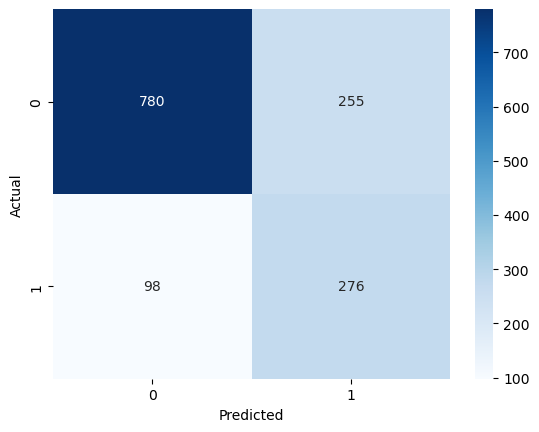

In [173]:
# use best_dt or final_dt from above
model = best_dt  # or final_dt

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Test precision:", precision_score(y_test, y_pred))
print("Test recall:", recall_score(y_test, y_pred))
print("Test f1:", f1_score(y_test, y_pred))
if y_prob is not None:
    print("Test ROC AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


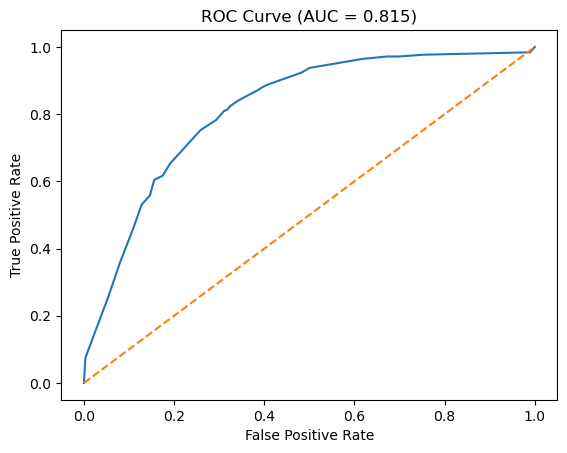

In [147]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.show()


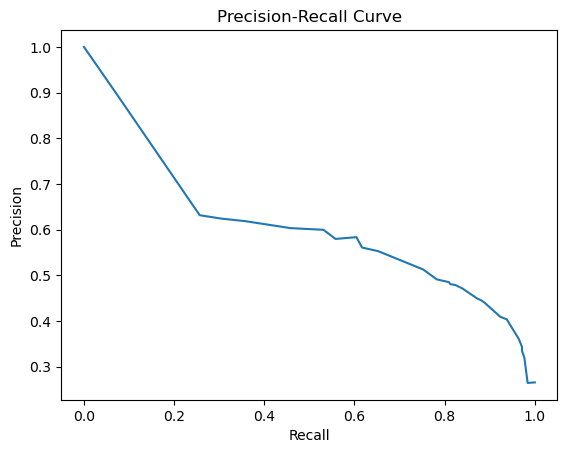

In [148]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


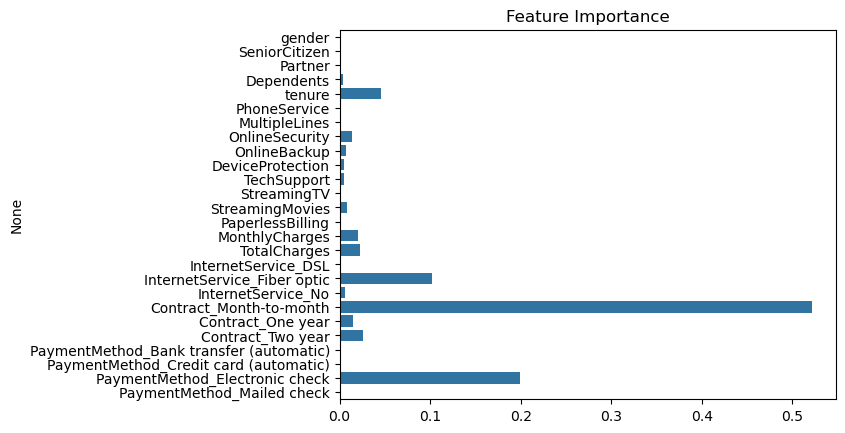

In [174]:
import pandas as pd

importances = model.feature_importances_
features = X_train.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()


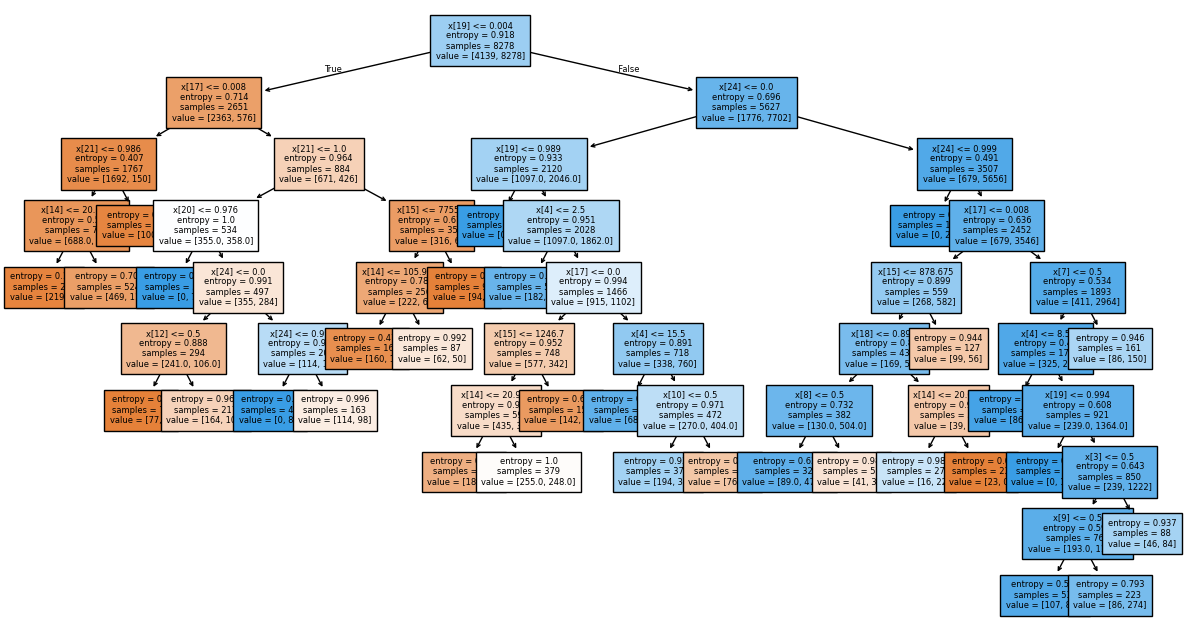

In [175]:
from sklearn import tree
plt.figure(figsize=(15, 8))
tree.plot_tree(model, filled=True, fontsize=6)
plt.show()


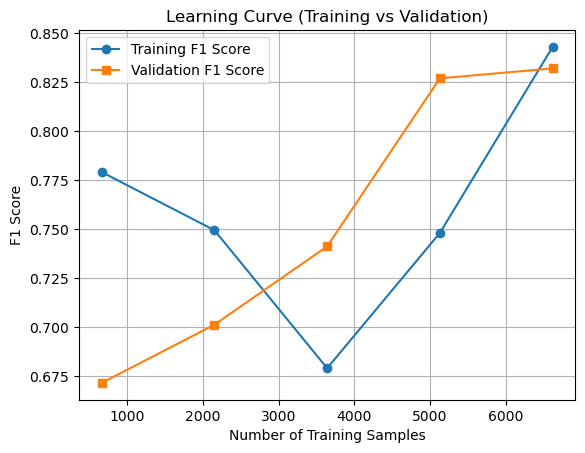

In [176]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    model, X_train, y_train, cv=cv, scoring="f1"
)

# Plot mean scores
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training F1 Score", marker="o")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation F1 Score", marker="s")

# Add labels and title
plt.xlabel("Number of Training Samples")
plt.ylabel("F1 Score")
plt.title("Learning Curve (Training vs Validation)")
plt.legend()
plt.grid(True)
plt.show()


In [152]:
# import json
#
# with open("best_params_decision tree.json", "w") as f:
#     json.dump(rs.best_params_, f)


In [153]:
# Save the model
import pickle
# with open("models/decision_tree_model.pkl", "wb") as f:
#     pickle.dump(dt, f)

# Load the model back
# with open("decision_tree_model.pkl", "rb") as f:
#     loaded_model = pickle.load(f)

#### Before hyperparameter tuning and after tuning result comparision

In [154]:
import shutil

# Zip the kt_tuner_dir folder
shutil.make_archive("model_his", 'zip', "model_his")

# Download the zipped folder
from google.colab import files
files.download("model_his.zip")


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#https://www.kaggle.com/code/rakkesharv/complete-guide-decision-trees-ml-modelling#8%EF%B8%8F%E2%83%A3-Python-Implementation---Decision-Tree

In [ ]:
model = keras.models.load_model("models/831_169__162_873_test_2.keras")

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(input_dim,)))
    # tune number of layers 1-3
    for i in range(hp.Int('num_layers', 1, 3)):
        units = hp.Int(f'units_{i}', min_value=16, max_value=256, step=16)
        model.add(keras.layers.Dense(units, activation='relu'))
        # optional dropout
        if hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1) > 0:
            model.add(keras.layers.Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # optimizer + learning rate
    opt_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if opt_choice == 'adam':
        lr = hp.Float('adam_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    elif opt_choice == 'rmsprop':
        lr = hp.Float('rmsprop_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    else:
        lr = hp.Float('sgd_lr', 1e-4, 1e-2, sampling='log')
        optimizer = keras.optimizers.SGD(learning_rate=lr)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=[keras.metrics.AUC(name='auc'), 'accuracy'])
    return model


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: w for i, w in enumerate(class_weights)}
print("Class weights:", class_weights)

Class weights: {0: np.float64(1.000138083402375), 1: np.float64(0.9998619547211486)}


In [ ]:
best_hps_test_02 = model.get_best_hyperparameters(1)[0]

# 2. Build the model using these hyperparameters
best_tuned_model_test_02 = build_model(best_hps_test_02)

# 3. Retrain the model so we get history (needed for visualization)
history_tuned_test_02 = best_tuned_model_test_02.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.1,
    class_weight=class_weights,
    batch_size=1024,
    callbacks=[keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=4, restore_best_weights=True
    )],
    verbose=2
)

AttributeError: 'Sequential' object has no attribute 'get_best_hyperparameters'